In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=257b844c0cc5720c680b7f610db0f588


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
   

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | jiddah
City not found. Skipping...
Processing Record 2 of Set 13 | shache
Processing Record 3 of Set 13 | ketchikan
Processing Record 4 of Set 13 | fortuna
Processing Record 5 of Set 13 | larsnes
Processing Record 6 of Set 13 | bengkulu
Processing Record 7 of Set 13 | ribeira grande
Processing Record 8 of Set 13 | kapaa
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | castro
Processing Record 11 of Set 13 | avarua
Processing Record 12 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 13 | clyde river
Processing Record 15 of Set 13 | alugan
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | puerto escondido
Processing Record 18 of Set 13 | bethel
Processing Record 19 of Set 13 | port elizabeth
Processing Record 20 of Set 13 | coquimbo
Processing Record 21 of Set 13 | hasaki
Processing Record 22 of S

Processing Record 31 of Set 16 | pemba
Processing Record 32 of Set 16 | lebu
Processing Record 33 of Set 16 | roma
Processing Record 34 of Set 16 | pisco
Processing Record 35 of Set 16 | manaus
Processing Record 36 of Set 16 | dubti
Processing Record 37 of Set 16 | yining
Processing Record 38 of Set 16 | lompoc
Processing Record 39 of Set 16 | thompson
Processing Record 40 of Set 16 | romos
Processing Record 41 of Set 16 | sivaki
Processing Record 42 of Set 16 | ponta do sol
Processing Record 43 of Set 16 | hithadhoo
Processing Record 44 of Set 16 | ayni
Processing Record 45 of Set 16 | vannes
Processing Record 46 of Set 16 | port hawkesbury
Processing Record 47 of Set 16 | college
Processing Record 48 of Set 16 | victoria
Processing Record 49 of Set 16 | launceston
Processing Record 50 of Set 16 | katobu
Processing Record 1 of Set 17 | biltine
Processing Record 2 of Set 17 | torbay
Processing Record 3 of Set 17 | ostrovnoy
Processing Record 4 of Set 17 | jimenez
Processing Record 5 of

Processing Record 18 of Set 20 | bud
Processing Record 19 of Set 20 | nushki
Processing Record 20 of Set 20 | houma
Processing Record 21 of Set 20 | tinyahuarco
Processing Record 22 of Set 20 | mayo
Processing Record 23 of Set 20 | faanui
Processing Record 24 of Set 20 | dawan
Processing Record 25 of Set 20 | linxia
Processing Record 26 of Set 20 | luyang
Processing Record 27 of Set 20 | guaruja
Processing Record 28 of Set 20 | geraldton
Processing Record 29 of Set 20 | taoudenni
Processing Record 30 of Set 20 | tasiilaq
Processing Record 31 of Set 20 | oneonta
Processing Record 32 of Set 20 | opuwo
Processing Record 33 of Set 20 | tucupita
Processing Record 34 of Set 20 | alta floresta
Processing Record 35 of Set 20 | fomboni
Processing Record 36 of Set 20 | fresnillo
Processing Record 37 of Set 20 | najran
Processing Record 38 of Set 20 | botshabelo
Processing Record 39 of Set 20 | tete
Processing Record 40 of Set 20 | magadi
Processing Record 41 of Set 20 | vostok
Processing Record 

Processing Record 4 of Set 24 | kodinsk
Processing Record 5 of Set 24 | sakakah
Processing Record 6 of Set 24 | saint-michel-des-saints
Processing Record 7 of Set 24 | kurkino
Processing Record 8 of Set 24 | springville
Processing Record 9 of Set 24 | tabou
Processing Record 10 of Set 24 | tigil
Processing Record 11 of Set 24 | shingu
Processing Record 12 of Set 24 | ciras
City not found. Skipping...
Processing Record 13 of Set 24 | san lawrenz
Processing Record 14 of Set 24 | hobyo
Processing Record 15 of Set 24 | taltal
Processing Record 16 of Set 24 | krasnodon
Processing Record 17 of Set 24 | beira
Processing Record 18 of Set 24 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 24 | sept-iles
Processing Record 20 of Set 24 | chepareria
Processing Record 21 of Set 24 | manavalakurichi
Processing Record 22 of Set 24 | kilindoni
Processing Record 23 of Set 24 | mardin
Processing Record 24 of Set 24 | nome
Processing Record 25 of Set 24 | santa isabel
Processing

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shache,38.4167,77.2406,73.71,30,97,16.80,CN,2022-07-31 00:20:16
1,Ketchikan,55.3422,-131.6461,64.87,94,100,9.22,US,2022-07-31 00:20:17
2,Fortuna,40.5982,-124.1573,72.93,74,20,12.66,US,2022-07-31 00:20:17
3,Larsnes,62.2028,5.5773,63.19,85,100,5.70,NO,2022-07-31 00:20:18
4,Bengkulu,-3.8004,102.2655,76.12,87,100,3.36,ID,2022-07-31 00:20:19
5,Ribeira Grande,38.5167,-28.7000,74.17,69,16,1.10,PT,2022-07-31 00:20:19
6,Kapaa,22.0752,-159.3190,85.19,68,20,12.66,US,2022-07-31 00:20:20
7,Busselton,-33.6500,115.3333,54.86,70,92,10.71,AU,2022-07-31 00:20:21
8,Castro,-24.7911,-50.0119,47.59,70,4,2.86,BR,2022-07-31 00:20:21
9,Avarua,-21.2078,-159.7750,78.85,73,75,21.85,CK,2022-07-31 00:20:22


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

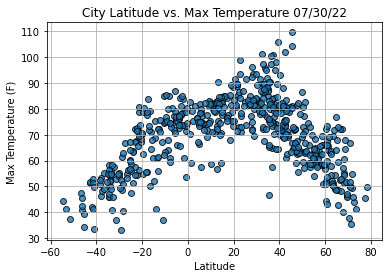

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

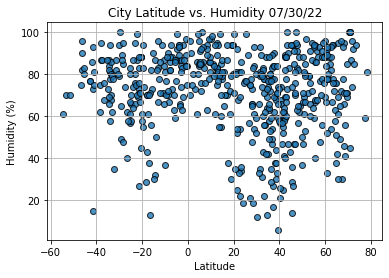

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

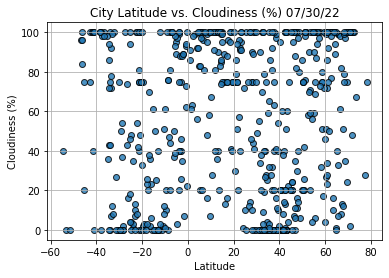

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

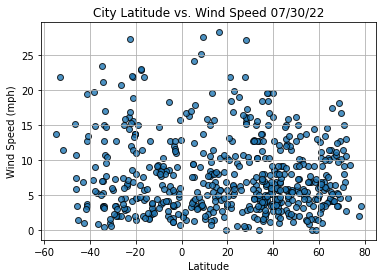

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
555     True
556    False
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shache,38.4167,77.2406,73.71,30,97,16.80,CN,2022-07-31 00:20:16
1,Ketchikan,55.3422,-131.6461,64.87,94,100,9.22,US,2022-07-31 00:20:17
2,Fortuna,40.5982,-124.1573,72.93,74,20,12.66,US,2022-07-31 00:20:17
3,Larsnes,62.2028,5.5773,63.19,85,100,5.70,NO,2022-07-31 00:20:18
5,Ribeira Grande,38.5167,-28.7000,74.17,69,16,1.10,PT,2022-07-31 00:20:19
...,...,...,...,...,...,...,...,...,...
551,Flin Flon,54.7682,-101.8650,60.96,64,100,1.23,CA,2022-07-31 00:36:21
555,Morro Bay,35.3658,-120.8499,90.39,66,32,4.00,US,2022-07-31 00:36:23
557,Baghdad,33.3406,44.4009,87.71,22,0,3.44,IQ,2022-07-31 00:36:24
558,Agucadoura,41.4318,-8.7804,81.25,62,0,3.60,PT,2022-07-31 00:36:25


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shache,38.4167,77.2406,73.71,30,97,16.80,CN,2022-07-31 00:20:16
1,Ketchikan,55.3422,-131.6461,64.87,94,100,9.22,US,2022-07-31 00:20:17
2,Fortuna,40.5982,-124.1573,72.93,74,20,12.66,US,2022-07-31 00:20:17
3,Larsnes,62.2028,5.5773,63.19,85,100,5.70,NO,2022-07-31 00:20:18
5,Ribeira Grande,38.5167,-28.7000,74.17,69,16,1.10,PT,2022-07-31 00:20:19


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

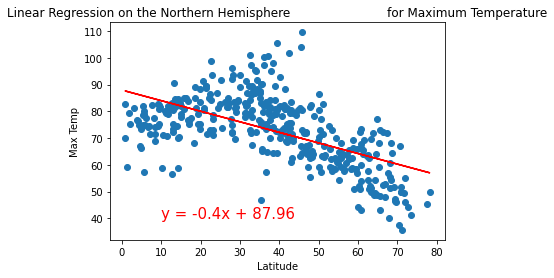

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

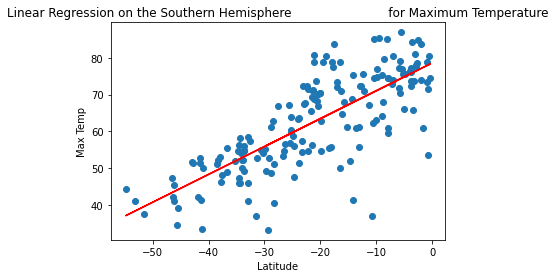

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

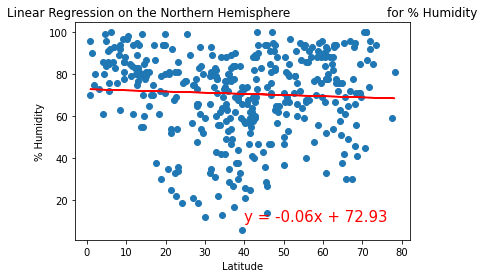

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

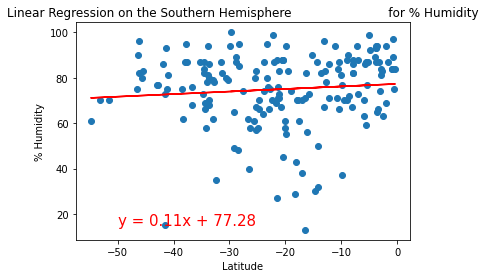

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

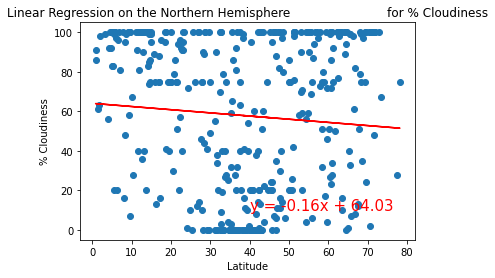

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

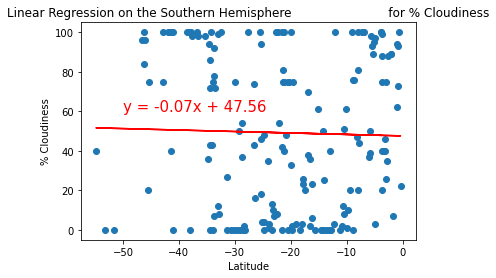

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

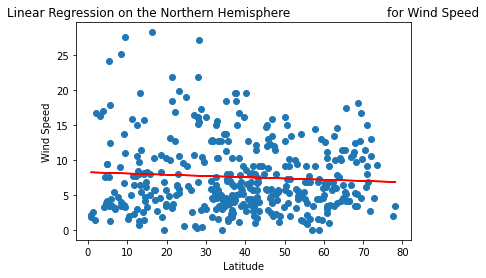

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

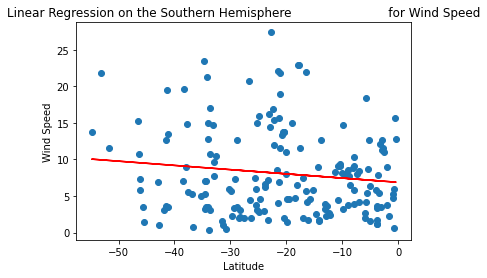

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))